# 範例

【今日無需提交作業，請完成今日範例練習與思考題，按下「我已完成」按鈕即可】

思考 Brute-Force Matching 在應用上是否有甚麼限制
特徵點 matching 是否還有其他的應用？panorama?

In [3]:
import cv2
import numpy as np

In [4]:
img_query_path = '../images/box.png'
img_train_path = '../images/box_in_scene.png'

# 以灰階方式讀入圖片
img_query = cv2.imread( img_query_path, 0 )
img_train = cv2.imread( img_train_path, 0 )

In [5]:
# 建立 SIFT 物件
SIFT_Detector = cv2.xfeatures2d_SIFT.create( )

# 偵測並計算 SIFT 特徵 ( Keypoints 關鍵點、Descriptor 128 為敘述子 )
kp_query, des_query = SIFT_Detector.detectAndCompute( img_query, None )
kp_train, des_train = SIFT_Detector.detectAndCompute( img_train, None )

## 基於 SIFT 特徵的暴力比對

- KNN 比對
- David Lowe's Ratio Test

In [6]:
# 建立 Brute-Force Matching 物件
BF = cv2.BFMatcher( cv2.NORM_L2 )

# 以 KNN 方式暴力比對特徵
matches = BF.knnMatch( des_query, des_train, k=2 )

In [7]:
# 透過 David Lowe's Ratio Test 排除不適合的配對
candidate = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        candidate.append( [m] )

In [ ]:
# 顯示配對結果
# 參數 flags=2 代表沒有配對成功的關鍵點不會被畫出來
img_show = cv2.drawMatchesKnn( img_query, kp_query, img_train, kp_train, candidate, None, flags=2 )

# 顯示圖片
while True:
    cv2.imshow( 'Brute-Force Matching', img_show )
    cv2.imwrite( 'Brute_Force_Matching.jpg', img_show )
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

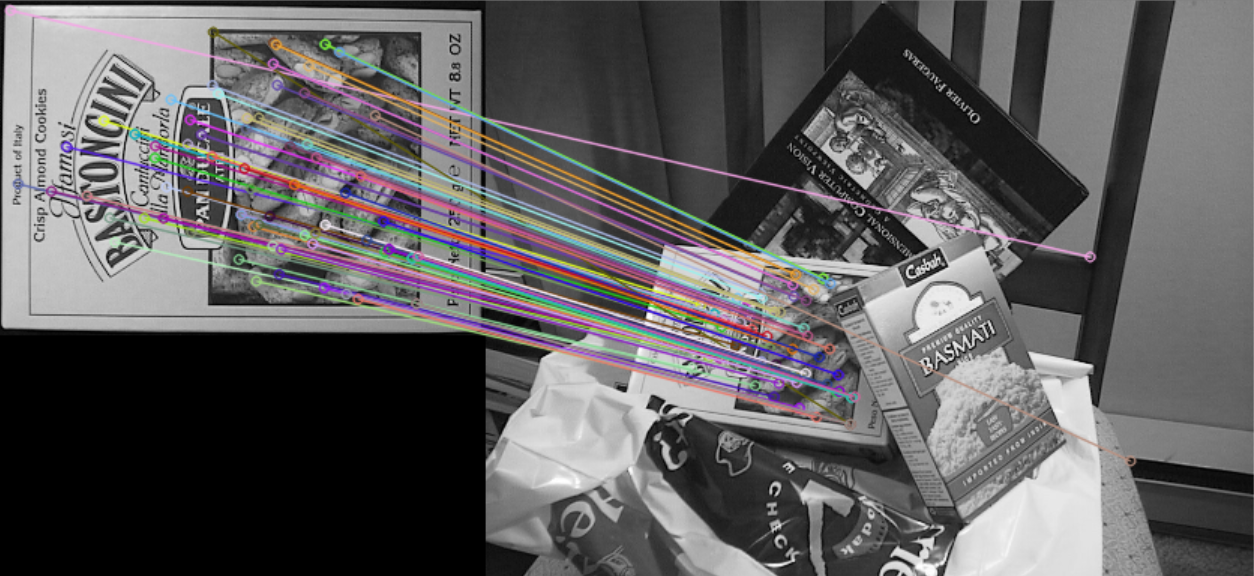